In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

This code imports the necessary Python libraries for data visualization, numerical computations, and deep learning using the TensorFlow framework. Specifically, the libraries being imported are:

`matplotlib.pyplot`: a plotting library for creating 2D graphs and visualizations.

`numpy`: a library for numerical computations in Python, particularly for working with arrays and matrices.

`os`: a library for operating system related tasks, such as navigating directories and manipulating file paths.

`tensorflow`: a popular deep learning framework used for building and training neural networks.

Once these libraries are imported, you can use their functions and classes in your code to perform tasks such as loading data, manipulating arrays, plotting graphs, and building deep learning models.

In [2]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
fid = drive.ListFile({'q':"title='fruits.zip'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('fruits.zip')
f.keys()
!unzip fruits.zip

Archive:  fruits.zip
  inflating: fruits/test/apple/Image_1.jpg  
  inflating: fruits/test/apple/Image_10.jpg  
  inflating: fruits/test/apple/Image_2.jpg  
  inflating: fruits/test/apple/Image_3.jpg  
  inflating: fruits/test/apple/Image_4.jpg  
  inflating: fruits/test/apple/Image_5.jpg  
  inflating: fruits/test/apple/Image_6.JPG  
  inflating: fruits/test/apple/Image_7.jpg  
  inflating: fruits/test/apple/Image_8.jpg  
  inflating: fruits/test/apple/Image_9.jpg  
  inflating: fruits/test/banana/Image_1.jpg  
  inflating: fruits/test/banana/Image_10.jpg  
  inflating: fruits/test/banana/Image_2.jpg  
  inflating: fruits/test/banana/Image_3.jpg  
  inflating: fruits/test/banana/Image_4.jpg  
  inflating: fruits/test/banana/Image_5.jpg  
  inflating: fruits/test/banana/Image_6.jpg  
  inflating: fruits/test/banana/Image_8.jpg  
  inflating: fruits/test/banana/Image_9.jpg  
  inflating: fruits/test/kiwi/Image_1.jpg  
  inflating: fruits/test/kiwi/Image_10.jpg  
  inflating: fruits/test

This code is downloading a dataset named "fruits.zip" from Google Drive using the PyDrive library in a Google Colab environment. The code first installs the PyDrive library, then imports the necessary modules from it.

The `auth.authenticate_user()` function is used to authenticate the user with their Google account credentials.

The `GoogleAuth()` function is used to create a new authentication object, and `GoogleCredentials.get_application_default()` is used to get the default application credentials for accessing the user's Google Drive.

The drive object is created using the authenticated Google Drive credentials.

The fid variable is assigned the file ID of the file with the name "fruits.zip" on Google Drive. The ListFile function is used to find the file ID of the file with the given title, and the GetList function returns a list of files with the specified title. The `[0]['id']` indexing operation is used to extract the file ID from the first item in the returned list.

The `f` object is created using the file ID, and the GetContentFile function is used to download the file and save it as "fruits.zip" in the current directory.

The `f.keys()` function is called to display the metadata of the downloaded file.

Finally, the unzip command is used to extract the contents of the "fruits.zip" archive.

In [3]:
train_dir = '/content/fruits/train'
validation_dir = '/content/fruits/validation'
test_dir = '/content/fruits/test'
BATCH_SIZE = 32
IMG_SIZE = (224, 224)
no_classes = 5

This code defines three directory paths for the train, validation, and test data of the fruit dataset. 
The `train_dir` variable points to the directory where the training data is stored, 
`validation_dir` points to the directory where the validation data is stored, and 
`test_dir` points to the directory where the test data is stored.

The `BATCH_SIZE` variable is set to 32, which is the number of samples that will be fed to the model at once during training.

The `IMG_SIZE` variable is set to (224, 224), which is the size to which the input images will be resized. This is a common input size for many pre-trained deep learning models.

The `no_classes` variable is set to 5, which is the number of classes or categories in the fruit dataset.

In [4]:
train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

validation_dataset = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)

test_dataset = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

Found 384 files belonging to 5 classes.
Found 48 files belonging to 5 classes.
Found 49 files belonging to 5 classes.


This code creates TensorFlow `tf.data.Dataset` objects from the image files in the train, validation, and test directories using the `tf.keras.utils.image_dataset_from_directory` function.

This function takes the following arguments:

`directory`: the directory path where the image files are stored.

`shuffle`: a boolean indicating whether to shuffle the dataset. If True, the data will be randomly shuffled before each epoch of training.

`batch_size`: the batch size to use during training.

`image_size`: the size to which the input images will be resized.

The function returns a `tf.data.Dataset object`, which is a TensorFlow object that represents a sequence of data. The train_dataset, validation_dataset, and test_dataset variables are assigned the corresponding `tf.data.Dataset` objects that were created from the train, validation, and test directories.

In [5]:
class_names = train_dataset.class_names
print(class_names)
class_names = validation_dataset.class_names
print(class_names)
class_names = test_dataset.class_names
print(class_names)

['apple', 'banana', 'kiwi', 'orange', 'watermelon']
['apple', 'banana', 'kiwi', 'orange', 'watermelon']
['apple', 'banana', 'kiwi', 'orange', 'watermelon']


This code extracts and prints the class names of the fruit dataset from the `tf.data.Dataset` objects that were created earlier.

The class_names variable is assigned the class_names attribute of each dataset object. The `class_names` attribute is a list of the class names (i.e., the names of the fruit types) in the dataset.

The `print` function is used to display the class names for each dataset.

This is useful for verifying that the class names were correctly loaded and for ensuring that the order of the class names is consistent across the different datasets.

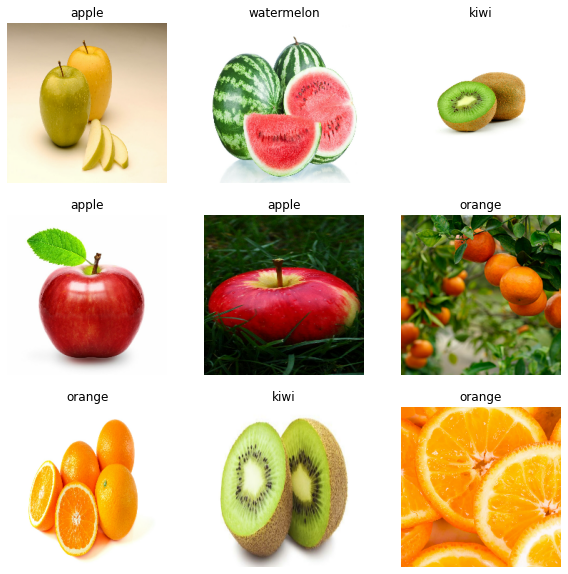

In [6]:
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

This code creates a 3x3 grid of subplots, each of which displays an image from the `train_dataset`. The `plt.figure` function is used to create a new figure with a size of 10x10 inches.

The outer `for` loop iterates over the batches of data in the train_dataset and takes only the first batch using the `take` method. The inner `for` loop iterates over the individual images and their corresponding labels in the batch.

The `plt.subplot` function is used to create a new subplot at the i-th position in the grid. The `plt.imshow` function displays the image, which is first converted from a TensorFlow tensor to a NumPy array using the `numpy` method, and then cast to uint8 data type. The `plt.title` function is used to set the title of the subplot to the corresponding fruit class name, which is obtained from the `class_names` list using the label index.

Finally, the `plt.axis` function is used to turn off the axis labels for the subplot. Overall, this code displays a grid of 9 fruit images with their corresponding class names, sampled from the `train_dataset`.

In [7]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(224, 224, 3))
x = layers.RandomContrast(0.2)(inputs)
x = layers.Conv2D(32, kernel_size=(3, 3), activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Conv2D(64, kernel_size=(3, 3), activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(no_classes, activation="softmax")(x)

model = keras.Model(inputs, outputs)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 random_contrast (RandomCont  (None, 224, 224, 3)      0         
 rast)                                                           
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0     

This code defines a basic convolutional neural network (CNN) architecture using the Keras functional API.

The `keras.Input` function is used to define the input shape of the model as a 224x224x3 tensor, which corresponds to an RGB image with height and width of 224 pixels.

The first layer is a `layers.RandomContrast` layer, which randomly adjusts the contrast of the input images by a factor between 0.8 and 1.2. This can help to increase the variability of the input data and improve model generalization.

The next layers are two 2D convolutional (`Conv2D`) layers with 32 and 64 filters, respectively, and a kernel size of 3x3 pixels. Both layers use ReLU activation functions to introduce non-linearity into the model.

The convolutional layers are followed by two 2D max pooling (`MaxPooling2D`) layers, which downsample the feature maps by a factor of 2 in each dimension. This reduces the spatial resolution of the feature maps while retaining their most important features.

The flattened output is then passed through a `layers.Dropout` layer with a rate of 0.5, which randomly sets half of the activations to zero during training. This helps to prevent overfitting by introducing a form of regularization.

The final layer is a `layers.Dense` layer with a number of neurons equal to the number of classes in the dataset, which is set to 5 in this case. The activation function is softmax, which produces a probability distribution over the 5 fruit classes.

The `keras.Model` function is used to create a Keras Model object that specifies the inputs and outputs of the model. The `summary` method is then called on the model object to display a summary of the model architecture, including the number of parameters and the output shape of each layer.

In [8]:
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)
model.fit(
    train_dataset,
    epochs=25,
    validation_data=validation_dataset,
)

Epoch 1/25


12/12 [==============================] - 56s 3s/step - loss: 673.0611 - accuracy: 0.2630 - val_loss: 63.6610 - val_accuracy: 0.4375
Epoch 2/25
12/12 [==============================] - 46s 3s/step - loss: 14.2562 - accuracy: 0.3620 - val_loss: 1.6335 - val_accuracy: 0.4167
Epoch 3/25
12/12 [==============================] - 46s 3s/step - loss: 1.1879 - accuracy: 0.4948 - val_loss: 1.7881 - val_accuracy: 0.5833
Epoch 4/25
12/12 [==============================] - 50s 3s/step - loss: 0.9945 - accuracy: 0.6510 - val_loss: 1.5053 - val_accuracy: 0.7708
Epoch 5/25
12/12 [==============================] - 43s 3s/step - loss: 0.6827 - accuracy: 0.7786 - val_loss: 2.0687 - val_accuracy: 0.8750
Epoch 6/25
12/12 [==============================] - 42s 3s/step - loss: 0.3783 - accuracy: 0.8932 - val_loss: 1.6222 - val_accuracy: 0.8542
Epoch 7/25
12/12 [==============================] - 42s 3s/step - loss: 0.3899 - accuracy: 0.8750 - val_loss: 1.4085 - val_accuracy: 0.8542
Epoch 8/25
12/12 [=========

This code compiles the defined CNN model using the Adam optimizer with a learning rate of 1e-3, sparse categorical cross-entropy loss, and accuracy as the evaluation metric.

The `model.fit` function is used to train the model on the training dataset for 25 epochs. During training, the model will be validated on the validation dataset at the end of each epoch.

Since the loss argument is set to "sparse_categorical_crossentropy", the `train_dataset` and `validation_dataset` need to contain integer labels, which they do in this case. If the labels were one-hot encoded, we would use "categorical_crossentropy" as the loss function instead.

Note that the model may take some time to train, depending on the size of the dataset and the complexity of the model architecture.

In [9]:
test_loss, test_accuracy = model.evaluate(test_dataset)

print("Test loss:", test_loss)
print("Test accuracy:", test_accuracy)

2/2 [==============================] - 4s 336ms/step - loss: 2.0529 - accuracy: 0.9184
Test loss: 2.0529162883758545
Test accuracy: 0.918367326259613


This code evaluates the trained CNN model on the test dataset using the model.evaluate function. The resulting `test_loss` and `test_accuracy` values are printed.

The model.evaluate function calculates the loss and accuracy of the model on the test dataset. Since the `loss` argument is set to "sparse_categorical_crossentropy" when compiling the model, the test dataset needs to contain integer labels.

Note that the test accuracy should be interpreted with caution, as it represents the accuracy on a single test set and may not generalize to other datasets. Additionally, it's important to ensure that the test set is representative of the real-world scenarios the model will be used in.

Saving Water-Melon-3200x1600-1-scaled.jpg to Water-Melon-3200x1600-1-scaled.jpg


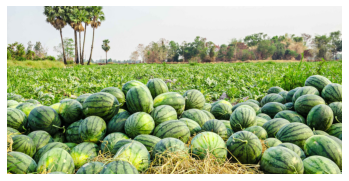

1/1 [==============================] - 0s 39ms/step
The predicted class is: watermelon


In [12]:
import IPython.display as display
from PIL import Image
import io
from google.colab import files

# Prompt the user to upload an image file
uploaded_file = files.upload()

# Load the image using Pillow
img = Image.open(io.BytesIO(uploaded_file[next(iter(uploaded_file))]))

# Display the uploaded image
plt.imshow(img)
plt.axis('off')
plt.show()

# Save the image to the content folder
img.save('uploaded_image.jpg')

# Load the image from the content folder
img = keras.preprocessing.image.load_img(
    'uploaded_image.jpg', target_size=(224, 224)
)

# Convert the image to a numpy array
img_array = keras.preprocessing.image.img_to_array(img)

# Expand the dimensions of the image to match the input shape of the model
img_array = np.expand_dims(img_array, axis=0)

# Preprocess the image
img_array = keras.applications.resnet50.preprocess_input(img_array)

# Make a prediction using the model
predictions = model.predict(img_array)

# Get the predicted class index
predicted_class_index = np.argmax(predictions, axis=1)[0]

# Get the predicted class name
predicted_class_name = class_names[predicted_class_index]

# Print the predicted class name
print("The predicted class is:", predicted_class_name)


This code allows the user to upload an image file, preprocess it, and make a prediction using the trained model.

First, the user is prompted to upload an image file using the `files.upload()`function from the `google.colab` module. The uploaded file is then loaded using the Pillow library and displayed using `matplotlib.pyplot.imshow()`.

The uploaded image is then saved to the content folder using `Pillow.Image.save()`, loaded from the content folder using `keras.preprocessing.image.load_img()`, and converted to a numpy array using `keras.preprocessing.image.img_to_array()`. The dimensions of the image are then expanded using `numpy.expand_dims()` to match the input shape of the model.

The image array is then preprocessed using `keras.applications.resnet50.preprocess_input()`, which applies the same preprocessing steps that were applied to the training data.

The `model.predict()` function is then used to make a prediction on the preprocessed image array, and the predicted class index is obtained using `numpy.argmax()`. Finally, the predicted class name is obtained from `class_names` using the predicted class index, and printed to the console using `print()`.